In [40]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import time
import numpy as np
from collections import deque
import torch
import matplotlib.pyplot as plt

from unityagents import UnityEnvironment
from pytorch.dqn_agent import DQNAgent
from pytorch.double_dqn_agent import DoubeDQNAgent

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
action_size = brain.vector_action_space_size
state_size = len(state)
score = 0 
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state
    time.sleep(0.01)
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


## DQN Algorithm

In [6]:
"""
You can train your own weights by running this code cell.
Just uncomment the cell and run. An earlier run is still displayed
"""

# env_info = env.reset(train_mode=True)[brain_name]
# state = env_info.vector_observations[0]
# action_size = brain.vector_action_space_size
# state_size = len(state)
# agent = DQNAgent(state_size=state_size, action_size=action_size)
# episodes = 5000
# scores_window = deque(maxlen=100)
# scores = []
# for e in range(episodes + 1):
#     env_info = env.reset(train_mode=True)[brain_name]
#     state = env_info.vector_observations[0]
#     state = np.reshape(state, [1, state_size])
#     score = 0
    
#     for t in range(1000):
#         action = agent.act(state)
#         env_info = env.step(action)[brain_name]
#         next_state = env_info.vector_observations[0]
#         next_state = np.reshape(next_state, [1, state_size])
#         reward = env_info.rewards[0]
#         done = env_info.local_done[0]
#         agent.step(state, action, reward, next_state, done)
#         state = next_state
#         score += reward
#         if done:
#             print("episode: {}/{}, score: {}, after time: {}".format(e, episodes, score, t))
#             break
            
#         if ((t+1)% 4) == 0:
#             if agent.memory.__len__()>=64:
#                 agent.replay()
    
#     if e==0:
#         print(agent.qnetwork.summary())
#         agent.save_weights(epoch=0)
    
#     if agent.epsilon > agent.epsilon_min:
#         agent.epsilon *= agent.epsilon_decay
    
#     scores.append(score)
#     scores_window.append(score)
#     if (e)%100 == 0:
#         mean_score = np.mean(scores_window)
#         print('\rEpisode {}\tAverage Score: {:.2f}'.format(e, mean_score))
#         if mean_score >= 10.0:
#             agent.save_weights(epoch=e)
#             break

#     if e%100 == 0:
#         agent.save_weights(epoch=e)

episode: 0/5000, score: 1.0, after time: 299
Model: "q-network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  2432      
_________________________________________________________________
dense_1 (Dense)              multiple                  4160      
_________________________________________________________________
dense_2 (Dense)              multiple                  260       
Total params: 6,852
Trainable params: 6,852
Non-trainable params: 0
_________________________________________________________________
None
Episode 0	Average Score: 1.00
episode: 1/5000, score: 0.0, after time: 299
episode: 2/5000, score: -1.0, after time: 299
episode: 3/5000, score: 1.0, after time: 299
episode: 4/5000, score: 0.0, after time: 299
episode: 5/5000, score: 0.0, after time: 299
episode: 6/5000, score: 1.0, after time: 299
episode: 7/5000, score: 0.0, after

episode: 158/5000, score: 1.0, after time: 299
episode: 159/5000, score: -2.0, after time: 299
episode: 160/5000, score: 1.0, after time: 299
episode: 161/5000, score: 0.0, after time: 299
episode: 162/5000, score: 3.0, after time: 299
episode: 163/5000, score: -2.0, after time: 299
episode: 164/5000, score: 1.0, after time: 299
episode: 165/5000, score: 1.0, after time: 299
episode: 166/5000, score: 2.0, after time: 299
episode: 167/5000, score: -1.0, after time: 299
episode: 168/5000, score: 1.0, after time: 299
episode: 169/5000, score: 0.0, after time: 299
episode: 170/5000, score: 1.0, after time: 299
episode: 171/5000, score: -2.0, after time: 299
episode: 172/5000, score: 0.0, after time: 299
episode: 173/5000, score: 0.0, after time: 299
episode: 174/5000, score: 1.0, after time: 299
episode: 175/5000, score: 0.0, after time: 299
episode: 176/5000, score: 0.0, after time: 299
episode: 177/5000, score: -2.0, after time: 299
episode: 178/5000, score: -1.0, after time: 299
episode

episode: 331/5000, score: 6.0, after time: 299
episode: 332/5000, score: 1.0, after time: 299
episode: 333/5000, score: 0.0, after time: 299
episode: 334/5000, score: 0.0, after time: 299
episode: 335/5000, score: 3.0, after time: 299
episode: 336/5000, score: 1.0, after time: 299
episode: 337/5000, score: 5.0, after time: 299
episode: 338/5000, score: 3.0, after time: 299
episode: 339/5000, score: 4.0, after time: 299
episode: 340/5000, score: 6.0, after time: 299
episode: 341/5000, score: 4.0, after time: 299
episode: 342/5000, score: 8.0, after time: 299
episode: 343/5000, score: 3.0, after time: 299
episode: 344/5000, score: 8.0, after time: 299
episode: 345/5000, score: 4.0, after time: 299
episode: 346/5000, score: 5.0, after time: 299
episode: 347/5000, score: 1.0, after time: 299
episode: 348/5000, score: 7.0, after time: 299
episode: 349/5000, score: 4.0, after time: 299
episode: 350/5000, score: 7.0, after time: 299
episode: 351/5000, score: 7.0, after time: 299
episode: 352/

episode: 504/5000, score: 5.0, after time: 299
episode: 505/5000, score: 7.0, after time: 299
episode: 506/5000, score: 12.0, after time: 299
episode: 507/5000, score: 4.0, after time: 299
episode: 508/5000, score: 15.0, after time: 299
episode: 509/5000, score: -2.0, after time: 299
episode: 510/5000, score: 3.0, after time: 299
episode: 511/5000, score: 8.0, after time: 299
episode: 512/5000, score: 12.0, after time: 299
episode: 513/5000, score: 6.0, after time: 299
episode: 514/5000, score: 5.0, after time: 299
episode: 515/5000, score: 8.0, after time: 299
episode: 516/5000, score: 3.0, after time: 299
episode: 517/5000, score: 15.0, after time: 299
episode: 518/5000, score: 2.0, after time: 299
episode: 519/5000, score: 9.0, after time: 299
episode: 520/5000, score: 4.0, after time: 299
episode: 521/5000, score: 11.0, after time: 299
episode: 522/5000, score: 13.0, after time: 299
episode: 523/5000, score: 8.0, after time: 299
episode: 524/5000, score: 8.0, after time: 299
episod

episode: 677/5000, score: 13.0, after time: 299
episode: 678/5000, score: 8.0, after time: 299
episode: 679/5000, score: 15.0, after time: 299
episode: 680/5000, score: 10.0, after time: 299
episode: 681/5000, score: 19.0, after time: 299
episode: 682/5000, score: 11.0, after time: 299
episode: 683/5000, score: 11.0, after time: 299
episode: 684/5000, score: 8.0, after time: 299
episode: 685/5000, score: 12.0, after time: 299
episode: 686/5000, score: 14.0, after time: 299
episode: 687/5000, score: 9.0, after time: 299
episode: 688/5000, score: 14.0, after time: 299
episode: 689/5000, score: 6.0, after time: 299
episode: 690/5000, score: 14.0, after time: 299
episode: 691/5000, score: 7.0, after time: 299
episode: 692/5000, score: 7.0, after time: 299
episode: 693/5000, score: 14.0, after time: 299
episode: 694/5000, score: 8.0, after time: 299
episode: 695/5000, score: 12.0, after time: 299
episode: 696/5000, score: 8.0, after time: 299
episode: 697/5000, score: 15.0, after time: 299


In [27]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
action_size = brain.vector_action_space_size
state_size = len(state)
score = 0 
state_size = len(state)
state = np.reshape(state, [1, state_size])
agent = DQNAgent(state_size=state_size, action_size=action_size)
agent.load_checkpoint('weights/dqn/cp-0960.pt')
for t in range(400):
    state = torch.from_numpy(state).float().unsqueeze(0).to(agent.device)
    act_values = agent.qnetwork(state)
    action = np.argmax(act_values.cpu().data.numpy())
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    next_state = np.reshape(next_state, [1, state_size])
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    score += reward
    state = next_state
    time.sleep(0.05)
    if done:
        break
    
print("Score: {}".format(score))

Score: 13.0


## Double DQN

In [32]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
action_size = brain.vector_action_space_size
state_size = len(state)
score = 0 
state_size = len(state)
state = np.reshape(state, [1, state_size])
agent = DoubeDQNAgent(state_size=state_size, action_size=action_size)
agent.load_checkpoint('weights/double_dqn/cp-0829.pt')
for t in range(400):
    state = torch.from_numpy(state).float().unsqueeze(0).to(agent.device)
    act_values = agent.qnetwork(state)
    action = np.argmax(act_values.cpu().data.numpy())
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    next_state = np.reshape(next_state, [1, state_size])
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    score += reward
    state = next_state
    time.sleep(0.05)
    if done:
        break
    
print("Score: {}".format(score))

Score: 18.0


In [33]:
env.close()

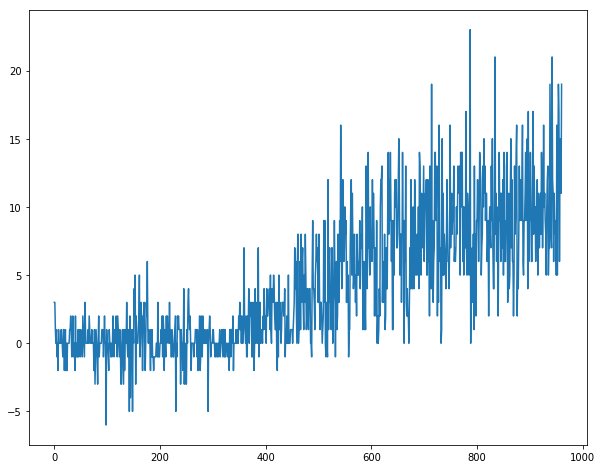

In [42]:
'''
Final scores for the dqn algorithm
'''
scores = np.load('weights/dqn/dqn_final_scores.npy')

x = np.arange(len(scores))
fig, axs = plt.subplots(1, 1, figsize=(10,8))

axs1 = plt.plot(x, scores)

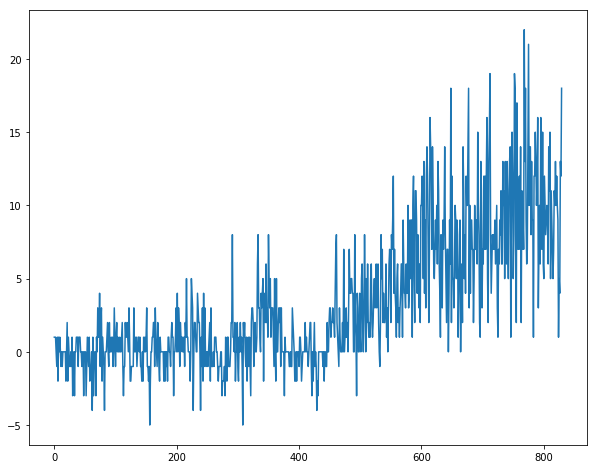

In [43]:
'''
Final scores for the double-dqn algorithm
'''
scores = np.load('weights/double_dqn/double_dqn_final_scores.npy')

x = np.arange(len(scores))
fig, axs = plt.subplots(1, 1, figsize=(10,8))

axs1 = plt.plot(x, scores)